In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline
#imports

In [2]:
df = pd.read_csv('C:/Users/Phil-Jon-D/Desktop/AY 2017-18/wine-reviews/winemag-data-130k-v2.csv', nrows=6000)

In [3]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Letting uncessary fields go

In [60]:
df2 = df.drop(['Unnamed: 0','taster_name','taster_twitter_handle','region_1','region_2','designation'],axis=1)

In [61]:
df2.head(10)

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",87,16.0,Sicily & Sardinia,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,87,24.0,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,87,12.0,Rheinhessen,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,87,27.0,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [62]:
df2.describe()

,points,price
count,6000.000000,5586.000000
mean,88.172667,34.586108
std,2.923345,49.768371
min,80.000000,4.000000
25%,86.000000,16.250000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,1900.000000


In [31]:
df2.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

### Looking at the count for price vs points signs of missing data can already be seen.

### <i>Looking for pesky outliers and missing data... </i>

<p>Before I started to plot graphs I decided to check for missing data.</p>

In [71]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country        3
description    0
points         0
price          0
province       3
title          0
variety        0
winery         0
dtype: int64

### <i> Droping the missing provinces and countries.</i>

In [74]:
df2.dropna(axis='rows',inplace=True)

In [59]:
df2['variety'].value_counts()

Pinot Noir                    577
Chardonnay                    513
Cabernet Sauvignon            461
Red Blend                     424
Bordeaux-style Red Blend      347
Sauvignon Blanc               247
Riesling                      213
Syrah                         201
Rosé                          152
Merlot                        142
Malbec                        135
Nebbiolo                      122
Sangiovese                    120
White Blend                   119
Zinfandel                     119
Portuguese Red                118
Sparkling Blend                90
Tempranillo                    72
Grüner Veltliner               68
Portuguese White               68
Gamay                          65
Cabernet Franc                 60
Rhône-style Red Blend          60
Pinot Gris                     58
Viognier                       54
Pinot Grigio                   53
Gewürztraminer                 51
Champagne Blend                48
Bordeaux-style White Blend     42
Petite Sirah  

In [73]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country        3
description    0
points         0
price          0
province       3
title          0
variety        0
winery         0
dtype: int64

In [64]:
 df2['price'].fillna(df['price'].mean(), inplace=True)

In [75]:
df2.apply(lambda x: sum(x.isnull()),axis=0)

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64

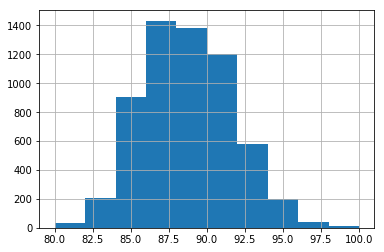

In [78]:
df2['points'].hist(bins=10)

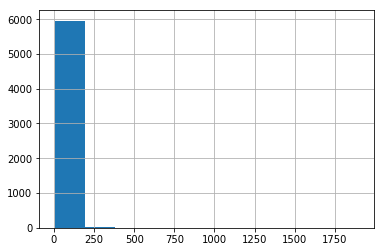

In [77]:
df2['price'].hist(bins=10)

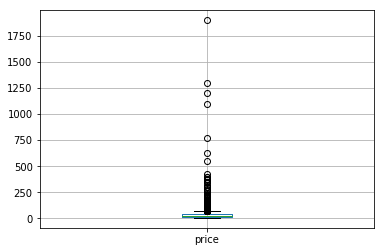

In [76]:
df2.boxplot(column='price')